# **Feature Stores: A Key Component in Data Management for Machine Learning**  

## **Introduction**  
With the advancement of **Machine Learning (ML)** and **Generative AI**, developing models based on multiple data sources has become increasingly common. However, this growth also introduces new challenges: ensuring the security of training data, maintaining the traceability of features, and efficiently storing information in a scalable way.  

As ML models become more complex and demanding, there is a growing need for a solution that optimizes data management for training and deploying models reliably. In this context, **Feature Stores** have become a critical component for managing and reusing features in AI and ML projects.  

![tutorial-aws-sagemaker-preview](img/tutorial-feature-aws-sagemaker-preview.png)

---

## **What is Feature Engineering?**  
**Feature Engineering** is the process of transforming raw data into variables (**features**) that can be used by machine learning models. This process is essential for improving model quality and performance since a well-designed feature selection and transformation can significantly impact prediction accuracy.  

The main stages of feature engineering include:  
* **Relevant Data Selection**: Identifying which variables or attributes are useful for the model.  
* **Data Cleaning and Preprocessing**: Handling missing values, removing noise, and normalizing data.  
* **Feature Transformation and Extraction**: Creating new features derived from the original data.  
* **Feature Storage and Reusability**: Efficiently saving features so they can be reused in different models and experiments.  

---


## **What is a Feature Store?**  
A **Feature Store** is a centralized repository designed to efficiently store, manage, and retrieve machine learning features. Its purpose is to optimize feature engineering, ensure consistency between training and inference, and promote feature reusability across different projects and teams.  

Feature Stores facilitate the integration between **data processing pipelines** and **AI models**, providing an abstraction layer that allows data scientists to access preprocessed features without having to repeat transformation tasks.  

### **Key Functions of a Feature Store**  

![tutorial-feature-components](img/tutorial-feature-main-functions.png)

* 📦 **1. Centralized Repository**: Stores all features in a single repository, ensuring accessibility and reusability across different models and experiments. This improves team collaboration and avoids duplicated efforts in feature engineering.  
* 🔍 **2. Versioning**: Tracks different versions of features over time. This is essential for **ML experiment reproducibility**, ensuring that models can be rebuilt with the same features used in previous training runs.  
* 🔄 **3. Consistency**: Ensures that the same features are used across all stages of the ML workflow, from **training** to **production inference**. This minimizes errors and discrepancies between historical and real-time data.  
* 🚀 **4. Efficiency**: Optimizes feature engineering by enabling fast access to preprocessed data. This reduces the time required for data preparation and transformation, boosting productivity for data science teams and accelerating model development.  
* 📈 **5. Scalability**: Designed to handle **large volumes of data**, ensuring that features can grow in size and complexity without impacting system performance.  
* 🔌 **6. Integration**: Connects with various components of the **ML and MLOps ecosystem**, including **databases, data processing pipelines, model training platforms, and deployment systems**.  

---

## **Components of a Feature Store**  
A **Feature Store** consists of several key elements that help structure and manage machine learning features. The following sections illustrate these components, representing them as essential building blocks of the system.  

![tutorial-feature-components](img/tutorial-feature-components.png)

### **1. Feature Group**  
The **Feature Group** is the primary storage unit within a Feature Store and consists of:  
- **Feature Group**: A collection of related features describing a specific entity (e.g., "Users," "Transactions," "Products").  
- **Feature Definition**: The structured definition of each feature within the group, including its data type (numerical, categorical, etc.).  
- **Record**: A row within the feature group that represents a unique observation with its corresponding values.  

### **2. Record Details**  
Each record stored in a Feature Store contains key details that enable traceability and efficient management:  
- **Event Time**: Represents the timestamp when a record was generated or updated. This is critical for **data versioning** and tracking changes over time.  
- **Record Identifier Name**: A unique identifier that allows access to a specific record within the Feature Store.  

### **3. Storage Options**  
A Feature Store provides two types of storage based on the needs of the ML model:  
- **Online Storage**: Optimized for **real-time queries**, useful for applications requiring fast predictions (e.g., e-commerce recommendations).  
- **Offline Storage**: Used for **batch processing**, storing large volumes of historical data for **model training and analysis**.  


## Tutorial: Implementing a Feature Store for a Delivery Application Use Case 


Imagine we work for a company that has developed a **delivery application**, where we manage two key datasets:  
1. **User Data** – Contains customer details such as demographics and preferences.  
2. **Transaction Data** – Records orders, payment details, and delivery history.  

![tutorial-feature-use-case-preview](img/tutorial-feature-use-case-preview.png)  


Due to challenges in **data management** faced by the **Data Science team**, we have decided to implement a **Feature Store**. This will allow us to **centralize, standardize, and efficiently store** user and transaction features, ensuring that they are:  
- **Easily accessible** for model training and inference.  
- **Consistent and up-to-date** across different machine learning workflows.  
- **Reusable** across multiple ML models without redundant preprocessing.  

In this tutorial, we will set up a **Feature Store** using **Amazon SageMaker**, enabling seamless integration with ML pipelines and improving the overall efficiency of data handling for predictive modeling.  

Now, let's review the **prerequisites** before we begin. 🚀

### ⚒ **Prerequisites**  

1. **Create a SageMaker Domain**  
2. **Launch a JupyterLab Python environment inside SageMaker Studio** (This step is optional, as the notebook can also be executed locally using AWS credentials to connect to the account. However, for simplicity, we will use this environment.)  
3. **Install dependencies after cloning the project** by running the following command:  

   ```bash
   !pip install -r requirements.txt
   ```
4. **Create an S3 Bucket and Upload DataFrames**  
   - Set up an **S3 bucket** to store the datasets.  
   - Upload the **DataFrames** located in the `"data"` folder to the created S3 bucket.

### ⚒ **Tutorial**  

Now, let's begin by exploring the data and performing a brief exploratory analysis. It is important to always validate **data quality** before storing it in a **Feature Store**. However, for this tutorial, we will focus on **analyzing the categorical variables** present in these datasets.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from io import StringIO
import boto3
from datetime import datetime

In [4]:
class S3:
    def __init__(self, bucket_name):
        self.bucket_name = bucket_name
        self.region_name = 'us-west-2'
        
    def s3_client(self):
        return boto3.client('s3', region_name=self.region_name)

    def s3_list_files(self):
        s3 = self.s3_client()
        response = s3.list_objects_v2(Bucket=self.bucket_name)
        if 'Contents' in response:
            return pd.json_normalize(response['Contents'])
        else:
            return pd.DataFrame()  # Devuelve un DataFrame vacío si no hay archivos

    def s3_read_file(self, key):
        s3 = self.s3_client()
        response = s3.get_object(Bucket=self.bucket_name, Key=key)
        csv_content = response['Body'].read().decode('utf-8')  
        data = pd.read_csv(StringIO(csv_content)) 
        return data



In [5]:
bucket_name = 'dev-delivery-data'
s3_object = S3(bucket_name=bucket_name)

In [6]:
# List an object 
s3_object.s3_list_files()

,Key,LastModified,ETag,ChecksumAlgorithm,Size,StorageClass
0,transactions.csv,2025-03-02 16:57:57+00:00,"""5bd359a3a4487f001a8f08fe2b5b6368""",[CRC64NVME],12596425,STANDARD
1,users.csv,2025-02-02 19:07:18+00:00,"""fd340f40b90f4127438aa7a7e94a29ba""",[CRC64NVME],844169,STANDARD


### **Delivery DataFrame**  

In this tutorial, we will build a **Feature Store** using simulated datasets from a **food delivery application**. The datasets we will use are described below:  

#### **👥 Users Dataset**  
> Contains information on **12,450 registered customers** in the application.  

- **user_id**: Unique customer identifier.  
- **gender**: User's gender.  
- **neighborhoods**: Neighborhood or area where the user lives.  
- **type_service**: Type of service subscribed.  
- **registration_channel**: Channel through which the user registered.  
- **registration_date**: Date when the user registered.  
- **birth_date**: User's birth date.  
- **system_operation**: User's operating system.  

#### **🛵 Transactions Dataset**  
> Contains **223,971 transactions** made between **April 1, 2020, and October 30, 2020**.  

- **transaction_id**: Unique transaction identifier.  
- **user_id**: Identifier of the user who made the purchase.  
- **amount**: Total purchase amount.  
- **shipping_costs**: Shipping costs associated with the transaction.  
- **discount_coupon**: Indicates whether a coupon was used.  
- **discount_coupon_amount**: Value of the discount applied.  
- **payment_method**: Payment method used.  
- **transaction_date**: Date and time of the transaction.  
- **delivery_type**: Type of delivery.

In [7]:
# Read and create two dataframes
transactions=s3_object.s3_read_file(key='transactions.csv')
users=s3_object.s3_read_file(key='users.csv')

In [8]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223971 entries, 0 to 223970
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   transaction_id          223971 non-null  int64  
 1   user_id                 223971 non-null  int64  
 2   amount                  223971 non-null  float64
 3   shipping_costs          223971 non-null  float64
 4   discount_coupon         223971 non-null  int64  
 5   discount_coupon_amount  223971 non-null  int64  
 6   payment_method          223971 non-null  object 
 7   transaction_date        223971 non-null  object 
 8   delivery_type           223971 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 15.4+ MB


In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12450 entries, 0 to 12449
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user_id               12450 non-null  int64 
 1   gender                12450 non-null  object
 2   neighborhoods         12450 non-null  object
 3   type_service          12450 non-null  object
 4   registration_channel  12450 non-null  object
 5   registration_date     12450 non-null  object
 6   birth_date            12450 non-null  object
 7   system_operation      12450 non-null  object
dtypes: int64(1), object(7)
memory usage: 778.3+ KB


### 🛠 **Creating the Feature Dataset**  

For this tutorial, we aim to create a **feature dataset** where each row represents a **unique user** of the delivery application, enriched with aggregated **transactional** and **behavioral** data.  

To facilitate this process, a set of **data transformation functions** has been prepared to structure the dataset before storing it in the **Feature Store**. The following steps demonstrate how user and transaction data are processed and merged to generate the **feature dataset** (also referred to as an **aggregated feature dataset**).

![tutorial-feature-use-case-table](img/tutorial-feature-use-case-table.png)

In [10]:
# create a new file where combine the two files

def process_transactions_and_users(transactions, users):
    # Step 1: Compute the most common delivery type per user
    tmp_delivery = (
        transactions
        .groupby(['user_id', 'delivery_type'])
        .size()
        .reset_index(name='counts')
        .sort_values(by=['user_id', 'counts'], ascending=[True, False])
        .drop_duplicates(subset='user_id')[['user_id', 'delivery_type']]
        .rename(columns={'delivery_type': 'common_delivery_type'})
    )

    # Step 2: Aggregate transaction-level metrics per user
    tmp_transactions = (
        transactions
        .groupby('user_id')
        .agg(
            total_transactions=('transaction_id', 'count'),
            total_amount=('amount', 'sum'),
            mean_amount=('amount', 'mean'),
            total_shipping_costs=('shipping_costs', 'sum'),
            total_discount_amount=('discount_coupon_amount', 'sum'),
            total_discounts=('discount_coupon', 'count')
        )
        .reset_index()
    )

    # Step 3: Combine user data, common delivery type, and transaction metrics
    result = (
        users
        .merge(tmp_delivery, on='user_id', how='left')  # Merge common delivery type
        .merge(tmp_transactions, on='user_id', how='left')  # Merge transaction metrics
        .reset_index()
        .rename(columns={'index': 'event_id'})
        .assign(
            event_id=lambda x: x['event_id'] + 1,  # Adjust event_id to start from 1
            event_time_stamp=pd.to_datetime(datetime.now()),  # Add current timestamp
        )
    )

    return result

# Example usage
result = process_transactions_and_users(transactions, users)


### 📊 **Analyzing Categorical Variables Before Feature Store Ingestion**  

Before storing data in the **Feature Store**, it is essential to validate its **quality and consistency** to prevent potential issues during ingestion and model training. A key step in this process is analyzing **categorical variables**, as inconsistencies, missing values, or rare categories can lead to errors or reduced model performance.  

In this section, we will examine the distribution of **categorical features** such as **gender, type of service, registration channel, operating system, and common delivery type**. By visualizing the data, we can detect anomalies, imbalances, or unexpected values, ensuring that the dataset is well-structured before being ingested into the Feature Store.  


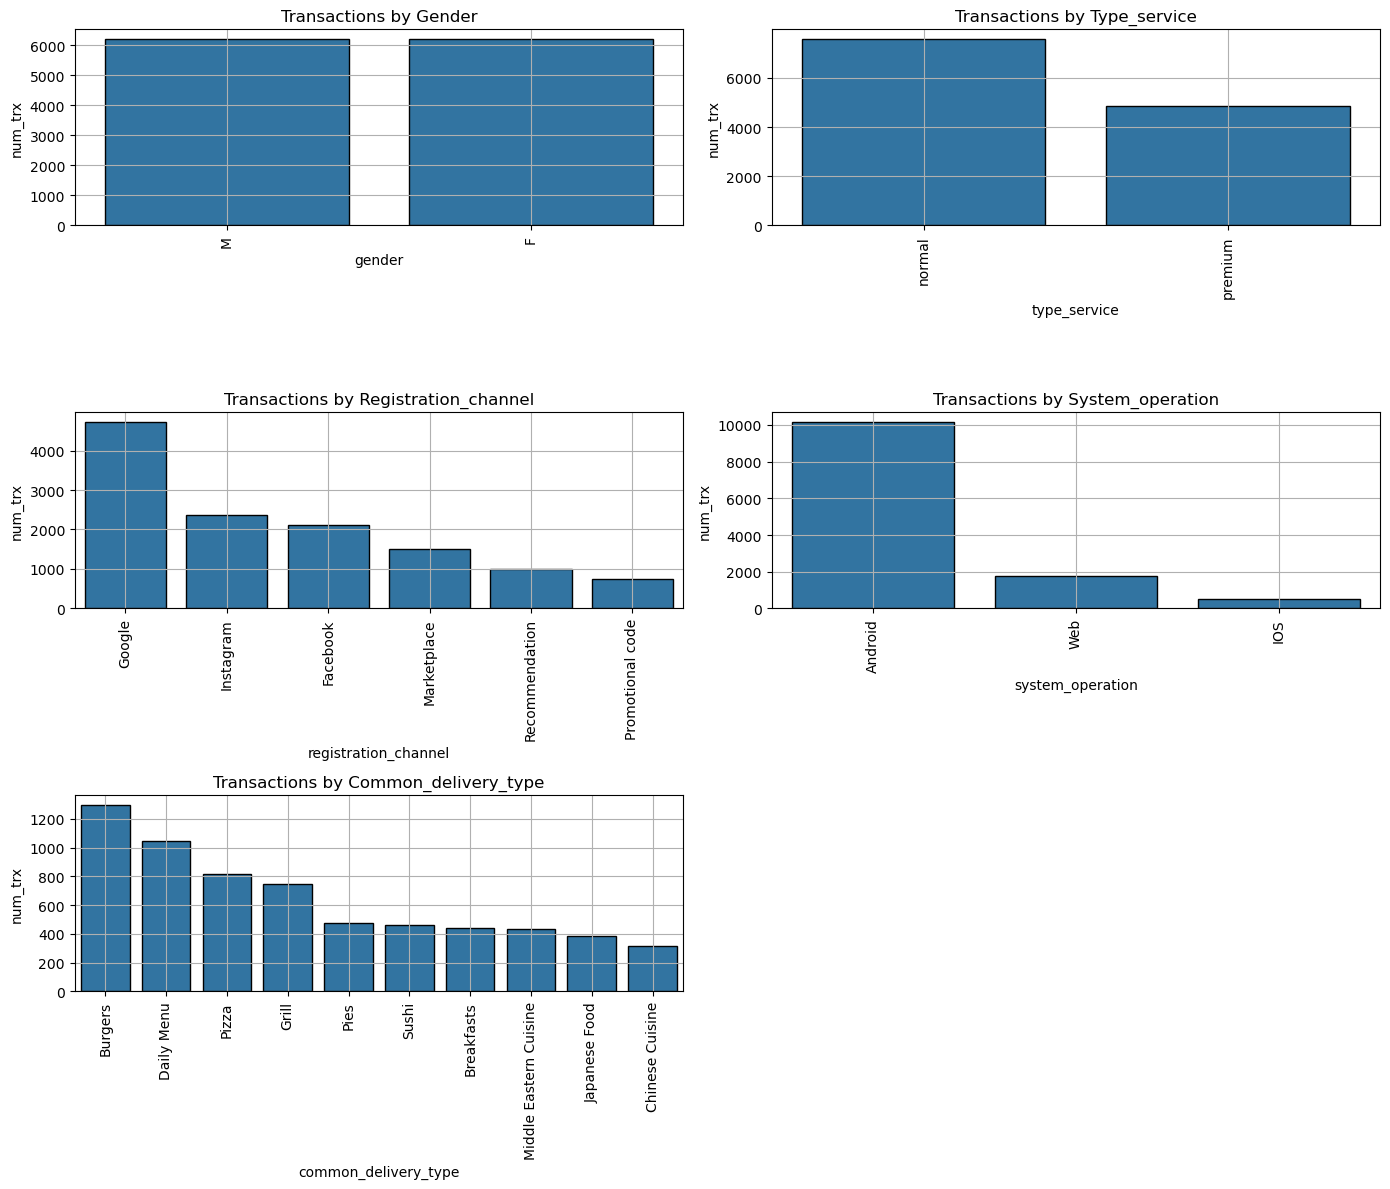

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['gender', 'type_service', 'registration_channel', 'system_operation', 'common_delivery_type']
num_results = 10

# Crear una figura con subplots en una cuadrícula de 2 columnas
fig, axes = plt.subplots(nrows=(len(columns) + 1) // 2, ncols=2, figsize=(14, 4 * ((len(columns) + 1) // 2)))

# Aplanar los ejes para iterar fácilmente
axes = axes.flatten()

for i, _column in enumerate(columns):
    tmp = (
        result
            .groupby([_column], as_index=False)['event_id']
            .count()
            .sort_values('event_id', ascending=False)
            .rename({'event_id': 'num_trx'}, axis=1)
            .head(num_results)
    )
    sns.barplot(data=tmp, x=_column, y='num_trx', edgecolor='black', ax=axes[i])  # Agregar borde negro a las barras
    axes[i].set_title(f'Transactions by {_column.capitalize()}')  # Agregar título
    axes[i].grid(True)  # Agregar cuadrícula
    axes[i].set_xticks(range(len(tmp[_column])))  # Configurar los ticks
    axes[i].set_xticklabels(tmp[_column], rotation=90)  # Rotar textos en el eje x

# Eliminar subplots vacíos si hay un número impar de gráficos
if len(columns) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

>
>### 📊 **Key Insights from Categorical Data**  
>
>- 👥 **Gender Balance:** The charts show a balanced number of transactions between men and women.  
>- 🏷 **Service Type Preference:** More purchases are made by users with the **"normal"** service  compared to **"premium."**  
>- 🌍 **Registration Channels:** Most registrations come from **Google**, followed by **Instagram** >and **Facebook**, while other channels like **Marketplace** and **Promotional Codes** have less >impact.  
>- 📱 **Operating System Trends:** **Android** dominates significantly, with far more transactions >than **Web** and **iOS**.  
>- 🍔 **Delivery Preferences:** **Burgers** are the most popular choice, followed by **Daily Menus** >, **Pizza** , and **Grill** , while options like **Chinese** and **Japanese Cuisine** have lower demand.  


### ⚙️ **SageMaker Configuration**  

Before creating and managing the **Feature Store**, we need to configure **Amazon SageMaker**. This involves initializing the necessary AWS **Boto3** clients and setting up a **SageMaker session** to interact with the Feature Store service.  

In [13]:
import boto3
import sagemaker
from sagemaker.session import Session


region = boto3.Session().region_name

boto_session = boto3.Session(region_name=region)

sagemaker_client = boto_session.client(service_name="sagemaker", region_name=region)
featurestore_runtime = boto_session.client(
    service_name="sagemaker-featurestore-runtime", 
    region_name=region
)

feature_store_session = Session(
    boto_session=boto_session,
    sagemaker_client=sagemaker_client,
    sagemaker_featurestore_runtime_client=featurestore_runtime,
)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


In [14]:
# change the bucket name to your desired bucket name
default_s3_bucket_name = feature_store_session.default_bucket()

print('bucket =>',default_s3_bucket_name)
print(f'url-link => https://s3.console.aws.amazon.com/s3/buckets/{default_s3_bucket_name}?region=eu-north-1&tab=objects')

bucket => sagemaker-us-west-2-905418403124
url-link => https://s3.console.aws.amazon.com/s3/buckets/sagemaker-us-west-2-905418403124?region=eu-north-1&tab=objects


### 🔐 IAM Configuration
To interact with Amazon SageMaker Feature Store, we need the appropriate IAM (Identity and Access Management) permissions.

In [15]:
from sagemaker import get_execution_role

# You can modify the following to use a role of your choosing. See the documentation for how to create this.
role = get_execution_role()
print('IAM role => ',role)

IAM role =>  arn:aws:iam::905418403124:role/service-role/AmazonSageMaker-ExecutionRole-20250202T214081


## 🛠 Feature Store: Steps to Creation

In **SageMaker Feature Store**, a **record** is a collection of values representing multiple features for a **single record identifier**. Each record is uniquely identified using a **record identifier** and an **event time**. The combination of these two elements ensures that each record within a **feature group** remains distinct over time.  

#### **Feature Store: Key Elements of a Feature Store Record:**  

- **Record Identifier Name**: A unique identifier assigned to each record. In this case, we use a **unique** `user_id` from the dataset as the **record identifier**.  
- **Event Time Feature Name**: A timestamp indicating when a record was **created or updated** in the feature group. 


In [18]:
# Create a timestamp record
import time
current_timestamp = int(round(time.time()))
print(f'* Current Time: {current_timestamp}')

# create the new column with timestamp 
result["EventTime"] = pd.Series([current_timestamp] * len(result), dtype="float64")

* Current Time: 1742137073


#### **Feature Store: Validate Data Types for Each Variable**  

Before ingesting data into **SageMaker Feature Store**, it is crucial to validate the **data types** of each feature. SageMaker Feature Store only supports three **data types**:  

- **String** → Used for categorical or text-based values.  
- **Integral** → Represents integer values (e.g., IDs, counts).  
- **Fractional** → Represents floating-point numbers (e.g., monetary values, averages).  

> Ensuring that each feature is correctly assigned to one of these data types helps **prevent ingestion errors** and maintains data consistency. 

In [19]:
import pandas as pd

def change_variables_datatypes(data):
    for column in data.columns:
        if data[column].dtype == "object":
            data[column] = data[column].astype("string")
        elif data[column].dtype == 'datetime64[ns]':
            data[column] = data[column].apply(lambda x: int(x.timestamp()))

    return data

# Convertir tipos de datos
data_features = change_variables_datatypes(result)
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12450 entries, 0 to 12449
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   event_id               12450 non-null  int64  
 1   user_id                12450 non-null  int64  
 2   gender                 12450 non-null  string 
 3   neighborhoods          12450 non-null  string 
 4   type_service           12450 non-null  string 
 5   registration_channel   12450 non-null  string 
 6   registration_date      12450 non-null  string 
 7   birth_date             12450 non-null  string 
 8   system_operation       12450 non-null  string 
 9   common_delivery_type   9658 non-null   string 
 10  total_transactions     9658 non-null   float64
 11  total_amount           9658 non-null   float64
 12  mean_amount            9658 non-null   float64
 13  total_shipping_costs   9658 non-null   float64
 14  total_discount_amount  9658 non-null   float64
 15  to

### 🛠 **Feature Store: Create Feature Group**  

A **Feature Group** in **SageMaker Feature Store** is a logical collection of features that share the same schema and are stored together. It acts as a structured repository where data scientists and ML engineers can access, manage, and retrieve feature data efficiently.  

Each **Feature Group** consists of:  

1. **Feature Definitions** → Defines each feature's name and data type (**String, Integral, or Fractional**).  
2. **Record Identifier** → A unique key that identifies each record within the feature group (e.g., `user_id`).  
3. **Event Time** → A timestamp that records when the feature was created or updated, enabling historical tracking.  
4. **Storage Configuration** →  
   - **Online Store** → Enables real-time feature retrieval for inference.  
   - **Offline Store** → Stores historical data for model training and batch processing.  


In [20]:
# 1. Define the Feature Group name with a timestamp

from datetime import datetime
current_date = datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
feature_group_name = f"delivery-food-feature-group-{current_date}"
print(f" * feature store group name: {feature_group_name}")

 * feature store group name: delivery-food-feature-group-2025-03-16-14-58-00


In [21]:
# 2. Initialize the Feature Group in SageMaker
from sagemaker.feature_store.feature_group import FeatureGroup

delivery_food_feature_group = FeatureGroup(
    name=feature_group_name, 
    sagemaker_session=feature_store_session
)

# 3. Define the record identifier and event time feature
feature_record_identifier = "user_id"
feature_record_event_time = "EventTime"

In [22]:
# 4. Load feature definitions: This method automatically detects the data type 
#    of each DataFrame column
delivery_food_feature_group.load_feature_definitions(data_frame=result)

[FeatureDefinition(feature_name='event_id', feature_type=<FeatureTypeEnum.INTEGRAL: 'Integral'>, collection_type=None),
 FeatureDefinition(feature_name='user_id', feature_type=<FeatureTypeEnum.INTEGRAL: 'Integral'>, collection_type=None),
 FeatureDefinition(feature_name='gender', feature_type=<FeatureTypeEnum.STRING: 'String'>, collection_type=None),
 FeatureDefinition(feature_name='neighborhoods', feature_type=<FeatureTypeEnum.STRING: 'String'>, collection_type=None),
 FeatureDefinition(feature_name='type_service', feature_type=<FeatureTypeEnum.STRING: 'String'>, collection_type=None),
 FeatureDefinition(feature_name='registration_channel', feature_type=<FeatureTypeEnum.STRING: 'String'>, collection_type=None),
 FeatureDefinition(feature_name='registration_date', feature_type=<FeatureTypeEnum.STRING: 'String'>, collection_type=None),
 FeatureDefinition(feature_name='birth_date', feature_type=<FeatureTypeEnum.STRING: 'String'>, collection_type=None),
 FeatureDefinition(feature_name='sy

In [23]:
# 5. Load the data in the feature store

# 5. Define the requirements to load data into the Feature Store
prefix = 'feature-store-delivery'
requirements = { 
    'url_s3': f"s3://{default_s3_bucket_name}/{prefix}",  # S3 location for offline storage
    'feature_record_identifier': feature_record_identifier,  # Unique identifier for each record
    'feature_record_event_time': feature_record_event_time,  # Timestamp for data versioning
    'role': role  # IAM role with required permissions
}

# 6. Define feature tags with descriptions for each column  

feature_tags = [
    {"Key": "event_id", "Value": "Unique event identifier"},
    {"Key": "user_id", "Value": "Unique customer identifier"},
    {"Key": "gender", "Value": "Customer gender"},
    {"Key": "neighborhoods", "Value": "Customer neighborhood or location"},  # Removed apostrophe
    {"Key": "type_service", "Value": "Type of service subscribed"},
    {"Key": "registration_channel", "Value": "Registration channel used"},
    {"Key": "registration_date", "Value": "Date of customer registration"},
    {"Key": "birth_date", "Value": "Customer birth date"},  # Removed apostrophe
    {"Key": "system_operation", "Value": "Operating system used by the customer"},
    {"Key": "common_delivery_type", "Value": "Most frequent type of delivery used by the customer"},
    {"Key": "total_transactions", "Value": "Total number of transactions made"},
    {"Key": "total_amount", "Value": "Total amount spent by the customer"},
    {"Key": "mean_amount", "Value": "Average transaction amount"},
    {"Key": "total_shipping_costs", "Value": "Total amount spent on shipping"},
    {"Key": "total_discount_amount", "Value": "Total value of discounts received"},
    {"Key": "total_discounts", "Value": "Total number of discounts applied"},
    {"Key": "event_time_stamp", "Value": "Event timestamp for record tracking"},
    {"Key": "EventTime", "Value": "Event time used for feature store versioning"}
]


In [27]:
def wait_for_feature_group_creation_complete(feature_group):
    """
    Waits until the specified Feature Group is successfully created.
    """
    status = feature_group.describe().get("FeatureGroupStatus")
    while status == "Creating":
        print("Waiting for Feature Group Creation")
        time.sleep(5)
        status = feature_group.describe().get("FeatureGroupStatus")
    if status != "Created":
        raise RuntimeError(f"Failed to create feature group {feature_group.name}")
    print(f"FeatureGroup {feature_group.name} successfully created.")


def feature_group_exists(feature_group_name):
    """
    Checks if a Feature Group with the specified name already exists.
    """
    try:
        sagemaker_client.describe_feature_group(FeatureGroupName=feature_group_name)
        return True
    except sagemaker_client.exceptions.ResourceNotFound:
        return False


def delete_feature_group(feature_group_name):
    """
    Deletes an existing Feature Group if it exists.
    """
    if feature_group_exists(feature_group_name):
        print(f"Feature Group '{feature_group_name}' exists. Deleting...")
        sagemaker_client.delete_feature_group(FeatureGroupName=feature_group_name)
        # Wait for deletion to complete
        while feature_group_exists(feature_group_name):
            print("Waiting for Feature Group to be deleted...")
            time.sleep(5)
        print(f"Feature Group '{feature_group_name}' deleted successfully.")
    else:
        print(f"Feature Group '{feature_group_name}' does not exist. Proceeding with creation.")


In [ ]:
# 7. Check if the Feature Group exists and delete it if necessary  
if feature_group_exists(feature_group_name=feature_group_name):
    delete_feature_group(feature_group_name)

In [30]:
# 8. Create a new Feature Group in SageMaker Feature Store  
delivery_food_feature_group.create(
    s3_uri=f"s3://{default_s3_bucket_name}/{prefix}",  # offline feature store bucket
    record_identifier_name=feature_record_identifier,
    event_time_feature_name=feature_record_event_time,
    role_arn=role,
    enable_online_store=True,
    tags=feature_tags  # Attach metadata tags to features
)
wait_for_feature_group_creation_complete(feature_group=delivery_food_feature_group)

Waiting for Feature Group Creation
Waiting for Feature Group Creation
Waiting for Feature Group Creation
Waiting for Feature Group Creation
Waiting for Feature Group Creation
Waiting for Feature Group Creation
Waiting for Feature Group Creation
Waiting for Feature Group Creation
FeatureGroup delivery-food-feature-group-2025-03-16-14-58-00 successfully created.


### 🔍 Feature Store: Feature Group Description  

When creating a feature group, several methods are available to analyze its information. For example:  

- **`list_feature_groups`**: Lists all feature groups associated with the account.  
- **`describe`**: Retrieves key metadata elements of a specific feature group. The main components are illustrated in the following image.  

![feature-store-describe](img/feature-store-describe.png)

In [32]:
# 9. Retrieve and display the metadata of the created Feature Group  
delivery_food_feature_group.describe()

{'FeatureGroupArn': 'arn:aws:sagemaker:us-west-2:905418403124:feature-group/delivery-food-feature-group-2025-03-16-14-58-00',
 'FeatureGroupName': 'delivery-food-feature-group-2025-03-16-14-58-00',
 'RecordIdentifierFeatureName': 'user_id',
 'EventTimeFeatureName': 'EventTime',
 'FeatureDefinitions': [{'FeatureName': 'event_id', 'FeatureType': 'Integral'},
  {'FeatureName': 'user_id', 'FeatureType': 'Integral'},
  {'FeatureName': 'gender', 'FeatureType': 'String'},
  {'FeatureName': 'neighborhoods', 'FeatureType': 'String'},
  {'FeatureName': 'type_service', 'FeatureType': 'String'},
  {'FeatureName': 'registration_channel', 'FeatureType': 'String'},
  {'FeatureName': 'registration_date', 'FeatureType': 'String'},
  {'FeatureName': 'birth_date', 'FeatureType': 'String'},
  {'FeatureName': 'system_operation', 'FeatureType': 'String'},
  {'FeatureName': 'common_delivery_type', 'FeatureType': 'String'},
  {'FeatureName': 'total_transactions', 'FeatureType': 'Fractional'},
  {'FeatureName'

In [38]:
print(f"List the feature groups that the sagemaker service has in this account \n{'.'*20}")
_list_feature_groups = sagemaker_client.list_feature_groups()
pd.json_normalize(_list_feature_groups['FeatureGroupSummaries'])

List the feature groups that the sagemaker service has in this account 
....................


,FeatureGroupName,FeatureGroupArn,CreationTime,FeatureGroupStatus
0,delivery-food-feature-group-2025-03-16-14-58-00,arn:aws:sagemaker:us-west-2:905418403124:featu...,2025-03-16 14:59:53.810000+00:00,Created
1,delivery-food-feature-group-2025-03-09-20-24-55,arn:aws:sagemaker:us-west-2:905418403124:featu...,2025-03-09 21:24:43.649000+00:00,Created


### 🚀 Feature Store: Data Ingestion
Once the Feature Groups are set up, records can be added to the feature store.


In [ ]:
# 10. Ingest the processed DataFrame into the Feature Store  
delivery_food_feature_group.ingest(data_frame=result, max_workers=3, wait=True)

### 👥 Feature Store: Retrieve Customer Data from a Feature Group

To access all stored variables for a specific customer, the **record identifier feature name**, such as **`user_id`**, is used. By providing the customer's unique **`user_id`**, their complete record can be extracted from the feature store.


In [59]:
def get_data_by_user_id(user_id:int):
    """
    Retrieves feature data for a specific user from the Feature Store
    """
    feature_record = featurestore_runtime.get_record(
    FeatureGroupName = feature_group_name,
    RecordIdentifierValueAsString = str(user_id),
    )
    return feature_record

def get_dataframe_by_user_id(user_id:int):
    """
    Retrieves and converts the feature data of a specific user into a pandas DataFrame.
    """
    feature_record = get_data_by_user_id(user_id)
    return (
        pd.json_normalize(feature_record['Record'])
        .set_index("FeatureName")
        .T
    )

def get_dataframe_by_list_user_id(user_id_list:list):
    """
    Retrieves feature data for multiple users and combines them into a single DataFrame.
    """
    data = pd.DataFrame()
    for user_id in user_id_list:
        tmp = get_dataframe_by_user_id(user_id)
        data = pd.concat([data,tmp]).reset_index(drop=True)
    return data


In [58]:
# 11. Retrieve and display feature data for a specific user 
get_dataframe_by_user_id(user_id=112339)

FeatureName,event_id,user_id,gender,neighborhoods,type_service,registration_channel,registration_date,birth_date,system_operation,common_delivery_type,total_transactions,total_amount,mean_amount,total_shipping_costs,total_discount_amount,total_discounts,event_time_stamp,EventTime
ValueAsString,5,112339,M,Chelsea,normal,Google,2020-05-08,1998-01-04,Web,Chicken,56.0,221.35,3.9526785714285713,385.2,900.0,56.0,1742137058,1742137073.0


In [61]:
# 12. Retrieve and display feature data for a group of users  
get_dataframe_by_list_user_id(user_id_list=[112339,124613])

FeatureName,event_id,user_id,gender,neighborhoods,type_service,registration_channel,registration_date,birth_date,system_operation,common_delivery_type,total_transactions,total_amount,mean_amount,total_shipping_costs,total_discount_amount,total_discounts,event_time_stamp,EventTime
0,5,112339,M,Chelsea,normal,Google,2020-05-08,1998-01-04,Web,Chicken,56.0,221.35,3.9526785714285713,385.2,900.0,56.0,1742137058,1742137073.0
1,12448,124613,F,Inwood,normal,Google,2020-10-03,1941-10-18,Android,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1742137058,1742137073.0


## 📦 **Feature Store: Amazon SageMaker Studio Data**  

In **SageMaker Studio**, you can explore the available **Feature Stores** under the **"Data"** tab. This section provides metadata for each feature store and offers an SQL-based interface for querying stored data.  

This functionality is available because a **Feature Store** automatically creates a corresponding table in **Amazon Athena**. Athena allows querying data stored in files using **SQL syntax**, making it easier to extract and analyze feature records.  

Below, you will find images demonstrating the step-by-step process for querying feature store data in SageMaker Studio.  

### **Feature Store Overview**  

- **Feature Store List**: This image shows all the feature stores that have been created.  
  ![feature-store-list](img/feature-store-list.png)  

- **Feature Store Variables**: This image displays all the variables available in a feature store.  
  ![feature-store-variables](img/feature-store-variables.png)  

- **Feature Store Tags**: This image presents all the tags created. We previously used these tags to define the meaning of each variable, as shown below.  
  ![feature-store-tags](img/feature-store-variables-tags.png)  

- **Feature Store Querying**: This image illustrates how to query the data using SQL. You can further explore this functionality in the **Amazon Athena** section, which explains how to retrieve data in SQL format.  
  ![feature-store-query](img/feature-store-query.png)  



### 📦 **Amazon Athena**  

When a feature store is created, a corresponding table with its data becomes available in **Amazon Athena**.  

Before running queries, ensure that an **S3 bucket** is configured for storing query results:  
- Click on **"Settings"** (gear icon in the top-right).  
- Under **"Query result location"**, click **"Manage"**.  
- If this is the first time, select or set up an **S3 bucket** to store the query results.  

Once configured, you can easily run SQL queries to select and extract data. The following image provides a step-by-step guide.

![athena-query](img/athena-query.png)

In [73]:
# Initialize Athena client
athena_client = boto3.client('athena')

# Define the query
query = """
        SELECT * 
        FROM "sagemaker_featurestore"."delivery_food_feature_group_2025_03_16_14_58_00_1742137193" 
        limit 10;
"""

# Define the output location in S3
output_folder = 'ouput-athena-queries'
output_location = f"s3://dev-delivery-data/{output_folder}/"

# Run the query
response = athena_client.start_query_execution(
    QueryString=query,
    QueryExecutionContext={"Database": "sagemaker_featurestore"},
    ResultConfiguration={"OutputLocation": output_location},
)

# Get Query Execution ID
query_execution_id = response["QueryExecutionId"]
print(f"Query Execution ID: {query_execution_id}")




Query Execution ID: 140f32b1-272b-4f46-92d5-a1067e99d9b1


In [74]:
# Read a file with sql query result
s3_object.s3_read_file(key=f'{output_folder}/{query_execution_id}.csv')

,event_id,user_id,gender,neighborhoods,type_service,registration_channel,registration_date,birth_date,system_operation,common_delivery_type,...,total_amount,mean_amount,total_shipping_costs,total_discount_amount,total_discounts,event_time_stamp,eventtime,write_time,api_invocation_time,is_deleted
0,4167,114722,M,Lower East Side,normal,Marketplace,2020-07-17,1994-02-06,Android,Bakery and Coffee,...,316.6700,19.791875,0.0,0.0,16.0,1742137058,1.742137e+09,2025-03-16 17:19:17.310,2025-03-16 17:14:16.000,False
1,8317,119529,F,Nolita,premium,Google,2020-07-11,1989-11-13,Web,Chinese Cuisine,...,474.2000,52.688889,0.0,0.0,9.0,1742137058,1.742137e+09,2025-03-16 17:19:17.310,2025-03-16 17:14:16.000,False
2,4179,114839,M,Lower East Side,premium,Instagram,2020-07-23,1991-11-06,Android,Vegetarian Food,...,637.8200,19.931875,0.0,0.0,32.0,1742137058,1.742137e+09,2025-03-16 17:19:17.310,2025-03-16 17:14:16.000,False
3,47,112680,M,Chelsea,premium,Facebook,2020-05-09,1995-01-03,Android,Latin American Food,...,464.8700,3.973248,853.5,500.0,117.0,1742137058,1.742137e+09,2025-03-16 17:19:17.310,2025-03-16 17:14:16.000,False
4,48,112701,F,Chelsea,normal,Facebook,2020-04-06,1999-04-05,Android,Pizza,...,380.3400,3.961875,700.2,1100.0,96.0,1742137058,1.742137e+09,2025-03-16 17:19:17.310,2025-03-16 17:14:16.000,False
5,8364,120195,M,Nolita,normal,Google,2020-06-11,1987-04-28,Android,Middle Eastern Cuisine,...,386.0200,48.252500,0.0,0.0,8.0,1742137058,1.742137e+09,2025-03-16 17:19:17.310,2025-03-16 17:14:17.000,False
6,8436,120936,M,Nolita,normal,Instagram,2020-07-10,1987-08-22,Android,Middle Eastern Cuisine,...,300.2853,33.365033,0.0,0.0,9.0,1742137058,1.742137e+09,2025-03-16 17:19:17.310,2025-03-16 17:14:18.000,False
7,4302,116233,F,Lower East Side,normal,Google,2020-06-07,1990-04-18,Android,Sushi,...,72.7900,18.197500,0.0,0.0,4.0,1742137058,1.742137e+09,2025-03-16 17:19:17.310,2025-03-16 17:14:18.000,False
8,216,114061,F,Chelsea,normal,Google,2020-04-01,1997-05-11,Web,Burgers,...,304.3400,9.510625,378.8,150.0,32.0,1742137058,1.742137e+09,2025-03-16 17:19:17.310,2025-03-16 17:14:18.000,False
9,4381,116967,F,Lower East Side,normal,Marketplace,2020-06-16,1990-09-20,Android,Pies,...,50.0393,16.679767,0.0,0.0,3.0,1742137058,1.742137e+09,2025-03-16 17:19:17.310,2025-03-16 17:14:19.000,False


# 📚 References
1. [Amazon SageMaker Studio](https://docs.aws.amazon.com/sagemaker/latest/dg/studio-updated.html)
2. [Create, store, and share features with Feature Store](https://docs.aws.amazon.com/sagemaker/latest/dg/feature-store.html)
3. [Amazon Athena Documentation](https://docs.aws.amazon.com/athena/)
